In [1]:
# Importing Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

%matplotlib inline 
from matplotlib.ticker import FuncFormatter
import matplotlib.style as style

import seaborn as sns

# Set today's date
import datetime as dt
today = dt.datetime.today().strftime("%Y.%m.%d")


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
import catboost
%matplotlib inline
from sklearn.preprocessing import LabelEncoder 



### Summary of the project 

In this project, we will create basic plots using Matplotlib, Pandas visualization and Seaborn as well as use some specific features of each library to exucute the explore the data. This project will focus on using different models such as Binary Logistic Regression, Decision Tree Classifier, Random Forest Classifier, a Support Vector Machine Classifier and an xgBoost classifier in creating a promotion algorithm.  


The project will make use of the Accuracy Score, Precision, Recall and Confusion Matrix for evaluating each model with the hold-out test data. Further, we will plot the Receiver operating characteristic (ROC) Curve for the five models. We will the employ the Hard Voting Ensemble Model of the five base models above to present a final model. 


# EXPLORATORY DATA ANALYSIS 

After starting our python, we can load our dataset. It contains information on $38312$ employers in a highly revered Essien business dynasty distinct. It is in a csv format and can easily be loaded with the following commands:


In [2]:
# importing data 
Data=pd.read_csv('DATA.csv')

This data captures employees with information pertaining qualificaltion, division, gender, channel of recriutments and other impotant features. The dataset includes $38312$ rows and $17$ columns.


In [3]:
# The size of Data set
print('The size of the Data :', Data.size)

# Show dimension of the data
print("Dimension: {}".format(Data.shape))

The size of the Data : 651304
Dimension: (38312, 17)


By profiling the data we are able to identify or check the number and types of feature we have in our data. We notice that all features have equal amout of values that is $38312$ except for "Qualification" which has $36633$ this indicates that "Qualifications" has some values missing values.  

In [4]:
# Profiling data 
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 17 columns):
EmployeeNo                             38312 non-null object
Division                               38312 non-null object
Qualification                          36633 non-null object
Gender                                 38312 non-null object
Channel_of_Recruitment                 38312 non-null object
Trainings_Attended                     38312 non-null int64
Year_of_birth                          38312 non-null int64
Last_performance_score                 38312 non-null float64
Year_of_recruitment                    38312 non-null int64
Targets_met                            38312 non-null int64
Previous_Award                         38312 non-null int64
Training_score_average                 38312 non-null int64
Foreign_schooled                       38312 non-null object
Past_Disciplinary_Action               38312 non-null object
Previous_IntraDepartmental_Movement    383

In [5]:
# Information about dataframe 
Data.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Foreign_schooled,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,No,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,Yes,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,Yes,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,Yes,No,No,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,Yes,No,No,1,0


In [6]:
# Cheking the shape of the data 
print("Number of records (Employers): ", Data.shape[0])
print("Number of columns (features): ", Data.shape[1])

Number of records (Employers):  38312
Number of columns (features):  17


We are able to get a good picture of the missing values by applying the "isnull().sum()" syntax, this tells us the exact feature which has the missing values. Here, we notice that "Qualification" has a total of $1679$ missing values representing $4.38 \%$ of the data. This value is quiet small but significant.   

In [7]:
# Checking for misisng data 

Data.isnull().sum()


EmployeeNo                                0
Division                                  0
Qualification                          1679
Gender                                    0
Channel_of_Recruitment                    0
Trainings_Attended                        0
Year_of_birth                             0
Last_performance_score                    0
Year_of_recruitment                       0
Targets_met                               0
Previous_Award                            0
Training_score_average                    0
Foreign_schooled                          0
Past_Disciplinary_Action                  0
Previous_IntraDepartmental_Movement       0
No_of_previous_employers                  0
Promoted_or_Not                           0
dtype: int64

In [8]:
# The Percentage of missing values in the Train_Riders dataset
Missing_Data = Data.isna().mean().round(4)*100
print('The percentage of missing values in the dataset is:', Missing_Data)

The percentage of missing values in the dataset is: EmployeeNo                             0.00
Division                               0.00
Qualification                          4.38
Gender                                 0.00
Channel_of_Recruitment                 0.00
Trainings_Attended                     0.00
Year_of_birth                          0.00
Last_performance_score                 0.00
Year_of_recruitment                    0.00
Targets_met                            0.00
Previous_Award                         0.00
Training_score_average                 0.00
Foreign_schooled                       0.00
Past_Disciplinary_Action               0.00
Previous_IntraDepartmental_Movement    0.00
No_of_previous_employers               0.00
Promoted_or_Not                        0.00
dtype: float64


We use the correlation matrix to measure of the linear relationship between two quantitative variables. 

In [10]:
# Obtaining the correlations 
Correlation_matrix=Data.corr()
Correlation_matrix

,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Promoted_or_Not
Trainings_Attended,1.000000,0.078710,-0.062042,0.056215,-0.044789,-0.007409,0.041065,-0.024345
Year_of_birth,0.078710,1.000000,-0.175572,0.654666,0.025337,0.013627,0.048390,0.017991
Last_performance_score,-0.062042,-0.175572,1.000000,-0.190333,0.276350,0.026587,0.057836,0.119690
Year_of_recruitment,0.056215,0.654666,-0.190333,1.000000,0.076910,0.041995,0.037477,0.012287
Targets_met,-0.044789,0.025337,0.276350,0.076910,1.000000,0.092934,0.077201,0.224518
Previous_Award,-0.007409,0.013627,0.026587,0.041995,0.092934,1.000000,0.072360,0.201434
Training_score_average,0.041065,0.048390,0.057836,0.037477,0.077201,0.072360,1.000000,0.178448
Promoted_or_Not,-0.024345,0.017991,0.119690,0.012287,0.224518,0.201434,0.178448,1.000000


Text(0.5, 1.05, 'Correlation_matrix')

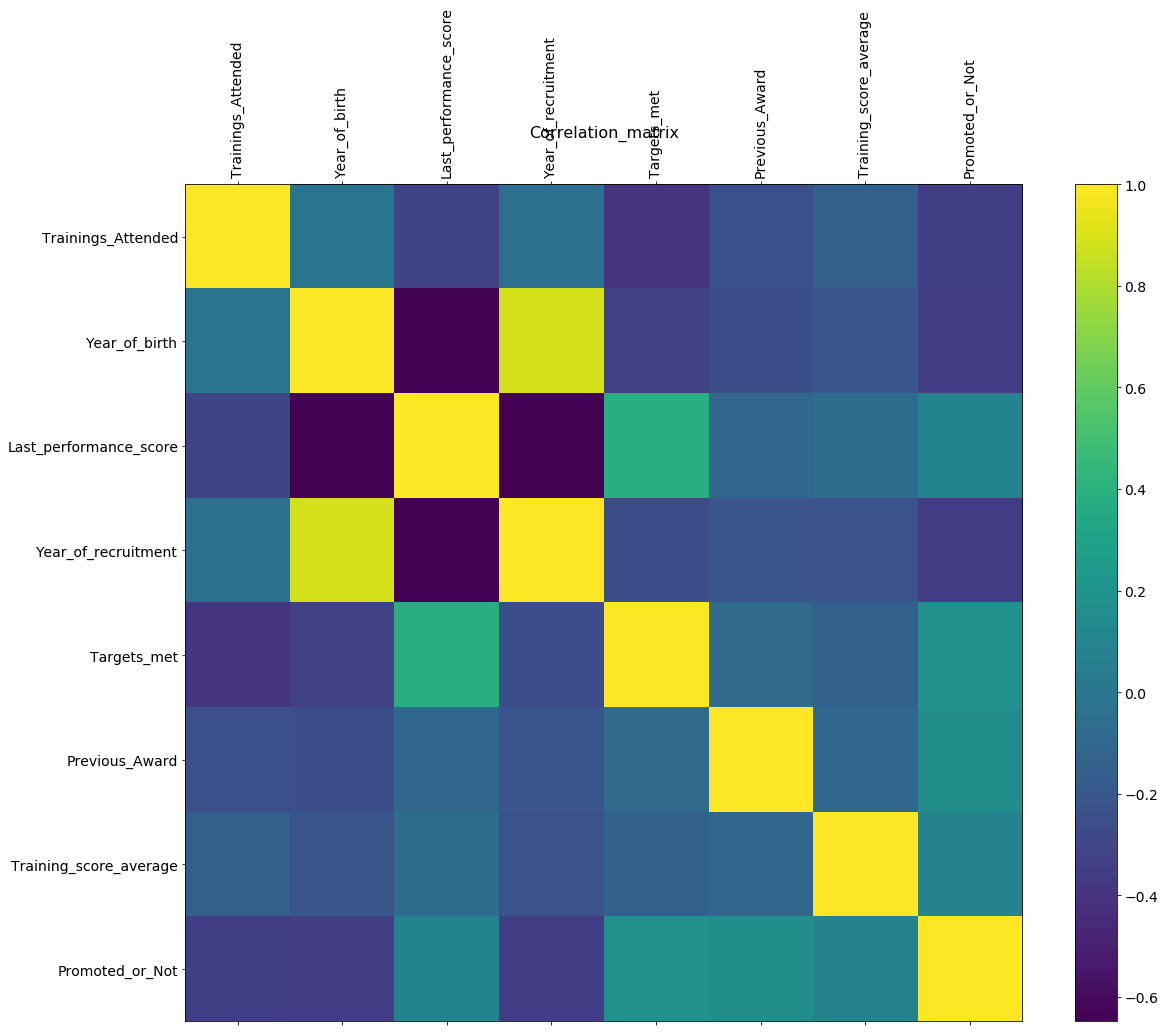

In [11]:
# Heatmap for correlation
f=plt.figure(figsize=(19,15))
plt.matshow(Correlation_matrix.corr(), fignum=f.number)
plt.xticks(range(Correlation_matrix.shape[1]),Correlation_matrix.columns,fontsize=14, rotation=90)
plt.yticks(range(Correlation_matrix.shape[1]),Correlation_matrix.columns,fontsize=14)
cb=plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation_matrix', fontsize=16)

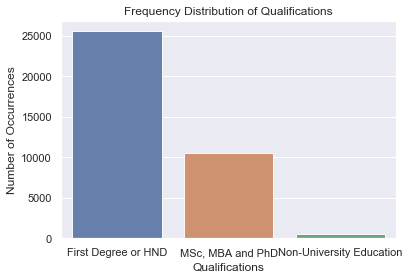

In [12]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
carrier_count = Data['Qualification'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of Qualifications')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Qualifications', fontsize=12)
plt.show()

In [13]:
Data.groupby("Division")["Last_performance_score"].mean()

Division
Business Finance Operations                    7.781355
Commercial Sales and Marketing                 7.081018
Customer Support and Field Operations          8.613132
Information Technology and Solution Support    7.286955
Information and Strategy                       8.119457
People/HR Management                           7.812500
Regulatory and Legal services                  7.114598
Research and Innovation                        8.110632
Sourcing and Purchasing                        7.741489
Name: Last_performance_score, dtype: float64

## Important observations:
· Performance ratings for employees in the Customer Support and Field Operations department is highest.



· Performance ratings for employees in the Commercial Sales and Marketing department is the lowest

However we observe that almost all department have very high ratings, this indicates a good performance in the company. 

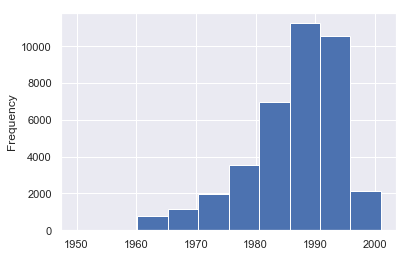

In [14]:
Data["Year_of_birth"].plot.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a25b2d588>,
      dtype=object)

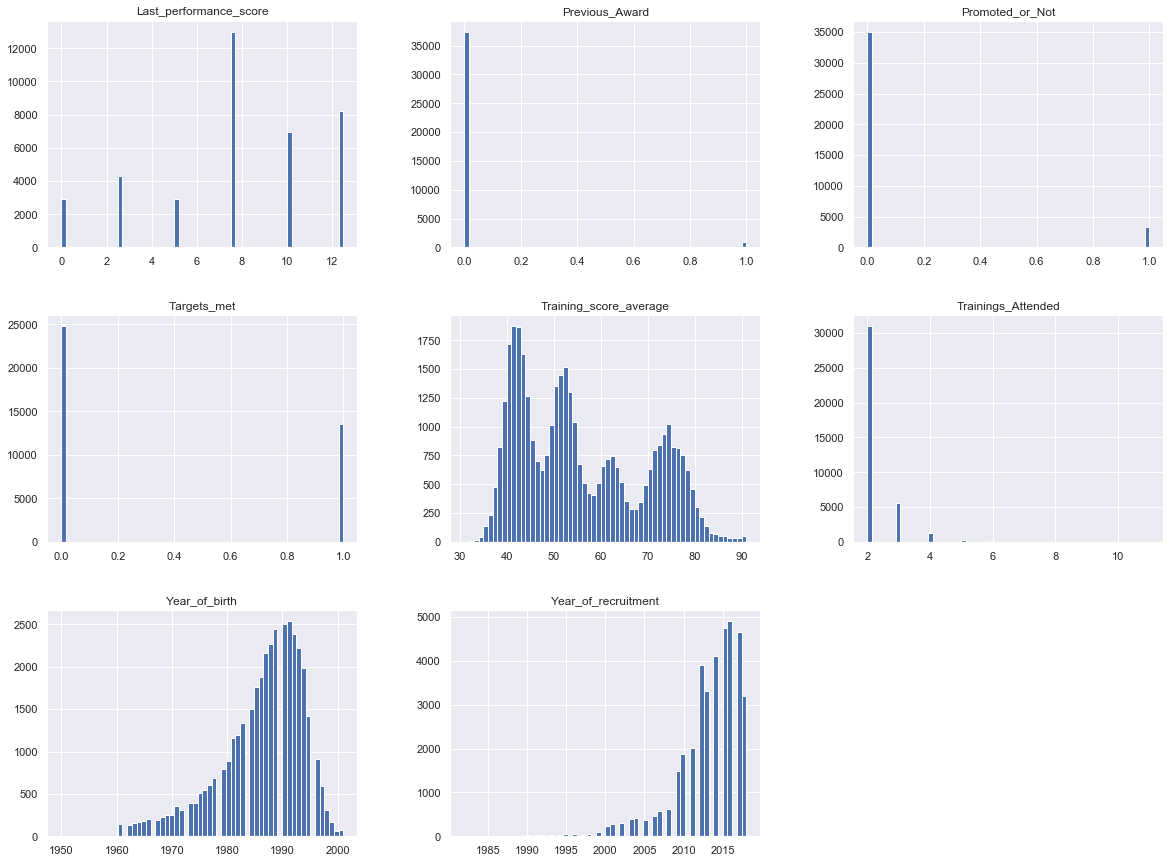

In [15]:
Data.hist(bins = 60, figsize = (20, 15))

Number of employees in the dataset: 38312


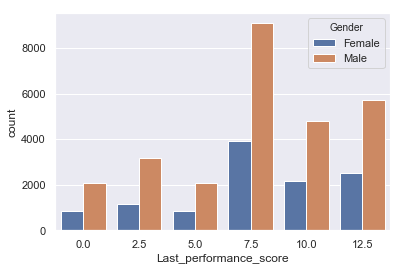

In [16]:

print("Number of employees in the dataset: " +str(len(Data.index)))
# Analyse the data
sns.countplot(x="Last_performance_score", hue="Gender", data=Data)

## Important Observations 

The number of employees is 38312.

In a seaborn plot of Performance Rating with respect to Gender, it is deduced that male employees outperform women. It is also observed that the rating of 7.5 is the most common.

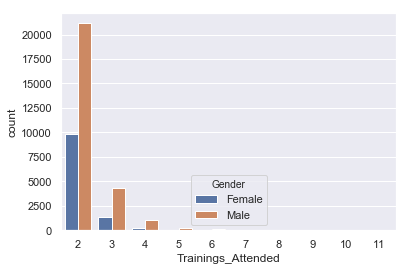

In [17]:
sns.countplot(x="Trainings_Attended", hue="Gender", data=Data)

In [18]:
Data['Qualification'].fillna('First Degree or HND', inplace= True)

In [19]:
Data.isnull().sum()

EmployeeNo                             0
Division                               0
Qualification                          0
Gender                                 0
Channel_of_Recruitment                 0
Trainings_Attended                     0
Year_of_birth                          0
Last_performance_score                 0
Year_of_recruitment                    0
Targets_met                            0
Previous_Award                         0
Training_score_average                 0
Foreign_schooled                       0
Past_Disciplinary_Action               0
Previous_IntraDepartmental_Movement    0
No_of_previous_employers               0
Promoted_or_Not                        0
dtype: int64

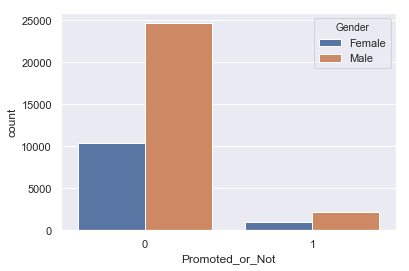

In [20]:
sns.countplot(x="Promoted_or_Not", hue="Gender", data=Data)

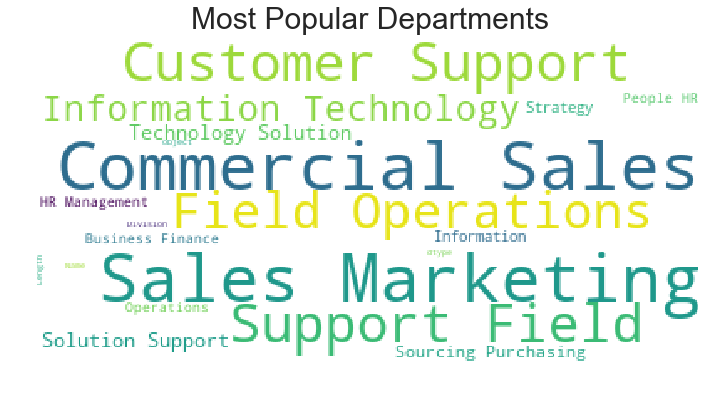

In [21]:
 #looking at the most popular departments

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopword = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'white', stopwords = stopword).generate(str(Data['Division']))

plt.rcParams['figure.figsize'] = (12, 8)
print(wordcloud)
plt.imshow(wordcloud)
plt.title('Most Popular Departments', fontsize = 30)
plt.axis('off')
plt.show()

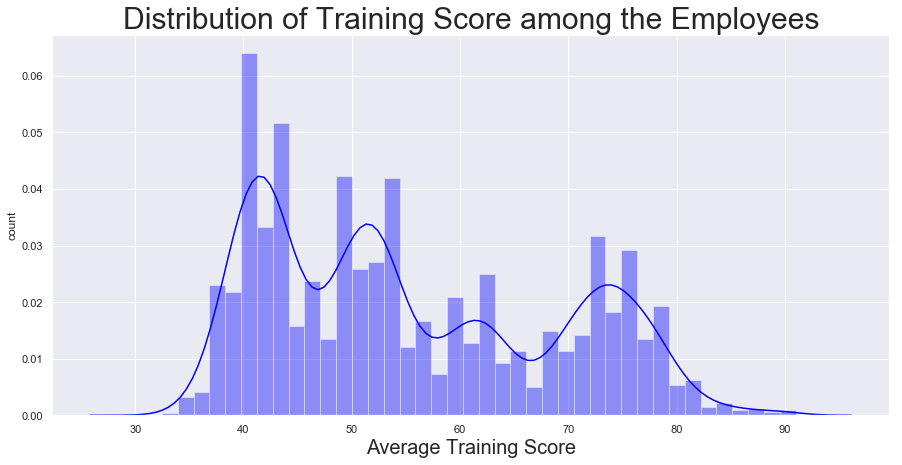

In [22]:
# checking the distribution of the avg_training score of the Employees

plt.rcParams['figure.figsize'] = (15, 7)
sns.distplot(Data['Training_score_average'], color = 'blue')
plt.title('Distribution of Training Score among the Employees', fontsize = 30)
plt.xlabel('Average Training Score', fontsize = 20)
plt.ylabel('count')
plt.show()

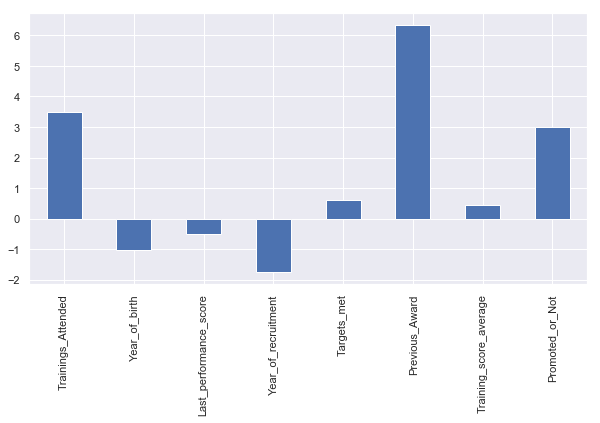

In [31]:
# Calculating Skewness in the columns of our Numeric dataset

Data.skew().plot.bar(figsize =(10,5))
plt.show()

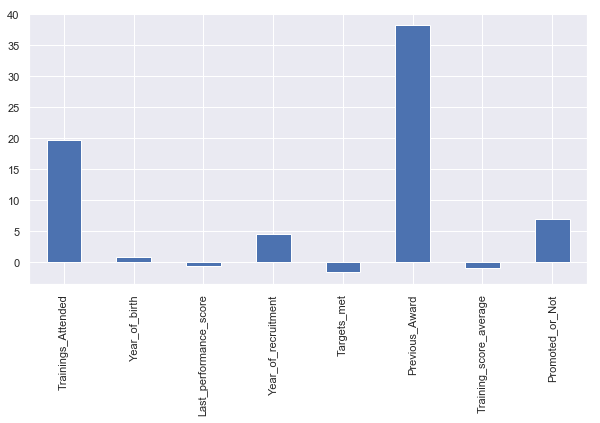

In [24]:
# Measuring Kurtosis in our Numeric dataset

Data.kurt().plot.bar(figsize =(10,5))
plt.show()


#### Summary statistics overview
We examine the distribution of the numeric features in data, it is important to check for the varialibilty of the features in order to make predictions as models rely on variability to learn and make predictions. The four main ways to describe variability in a data set are through the range, mean, standard deviation and variance. The mean value is greater than the median value of each column represented by 50% in the row. We notice that Trainings_Attended, Previous_Award, and Promoted_or_Not have smaller standard deviation which indicates that these features are clustered tightly hence implies thats these features have less variation so we expect those to carry a lesser weight in predictions. On the other hand, features such as, Targets_met, Training_score_average, Year_of_recruitment,Year_of_birth, and Last_performance_score have high variation and are very spread out around the mean which implies a higher variation. 



In [28]:
Target_Column = ['Promoted_or_Not']
Predictors = list(set(list(Data.columns))-set(Target_Column))
Numeric_Data = Data._get_numeric_data()
Sum_Stat = Numeric_Data.describe(include='all')
Sum_Stat = Sum_Stat.transpose()
Sum_Stat

,count,mean,std,min,25%,50%,75%,max
Trainings_Attended,38312.0,2.253680,0.609443,2.0,2.0,2.0,2.0,11.0
Year_of_birth,38312.0,1986.209334,7.646047,1950.0,1982.0,1988.0,1992.0,2001.0
Last_performance_score,38312.0,7.698959,3.744135,0.0,5.0,7.5,10.0,12.5
Year_of_recruitment,38312.0,2013.139695,4.261451,1982.0,2012.0,2014.0,2016.0,2018.0
Targets_met,38312.0,0.352996,0.477908,0.0,0.0,0.0,1.0,1.0
Previous_Award,38312.0,0.023152,0.150388,0.0,0.0,0.0,0.0,1.0
Training_score_average,38312.0,55.366465,13.362741,31.0,43.0,52.0,68.0,91.0
Promoted_or_Not,38312.0,0.084595,0.278282,0.0,0.0,0.0,0.0,1.0


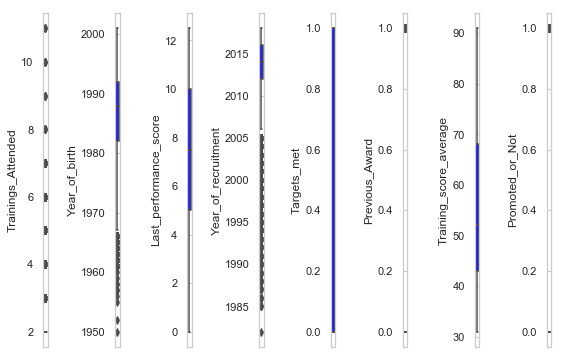

In [68]:
# Visualising outliers using boxplot 
lent = Numeric_Data.columns.values
number_of_columns = 8
number_of_rows = len(lent)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(lent)):
    plt.subplot(number_of_rows + 1, number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(Data[lent[i]],color='blue',orient='v')
    plt.tight_layout()

In [29]:
Data['Previous_Award'].value_counts()

0    37425
1      887
Name: Previous_Award, dtype: int64

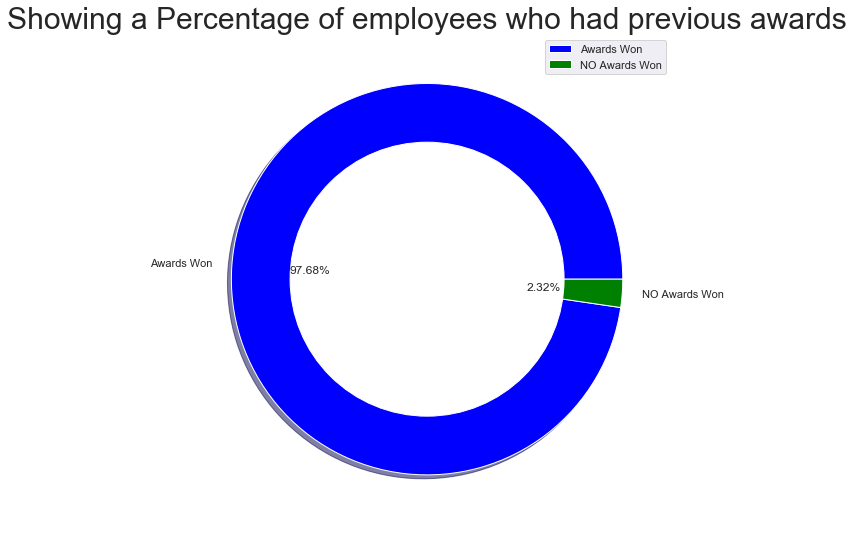

In [30]:

# plotting a doughnut chart for visualizing each of the recruitment channel's share

size = [37425, 887]
colors = ['blue', 'green']
labels = "Awards Won", "NO Awards Won"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Showing a Percentage of employees who had previous awards', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

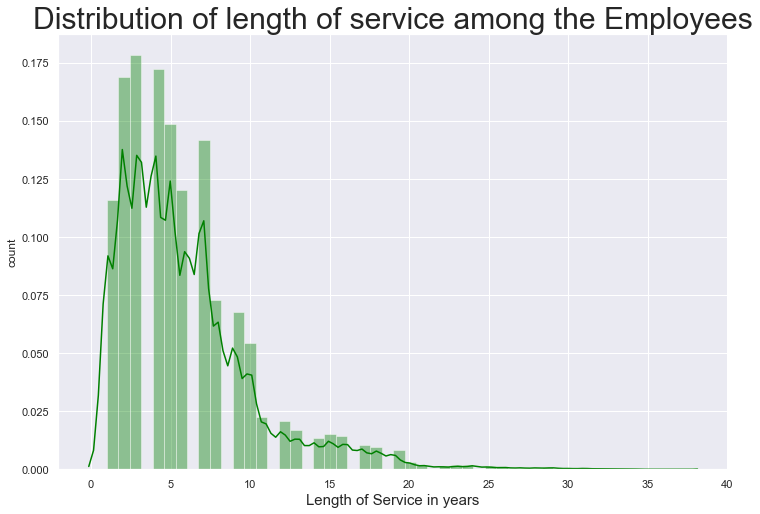

In [62]:
# checking the distribution of length of service
sns.distplot(Data['Length_of_service'], color = 'green')
plt.title('Distribution of length of service among the Employees', fontsize = 30)
plt.xlabel('Length of Service in years', fontsize = 15)
plt.ylabel('count')
plt.show()

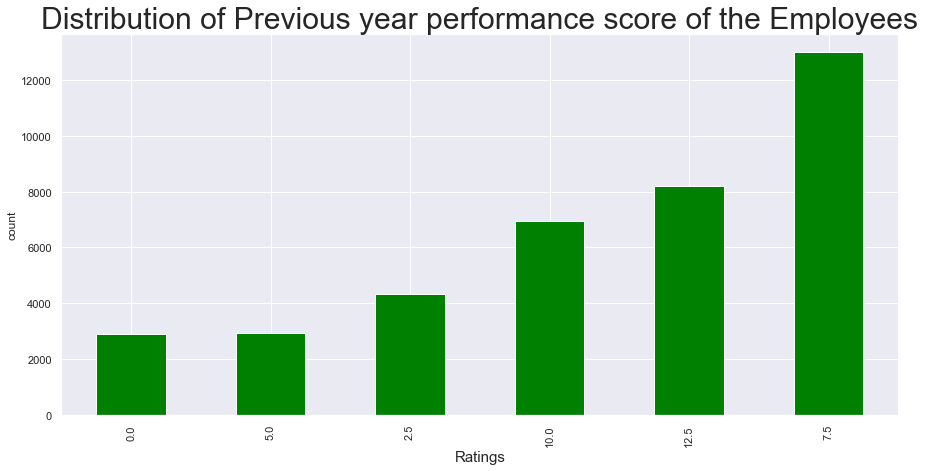

In [32]:
# Previous performance score 
Data['Last_performance_score'].value_counts().sort_values().plot.bar(color = 'green', figsize = (15, 7))
plt.title('Distribution of Previous year performance score of the Employees', fontsize = 30)
plt.xlabel('Ratings', fontsize = 15)
plt.ylabel('count')
plt.show()

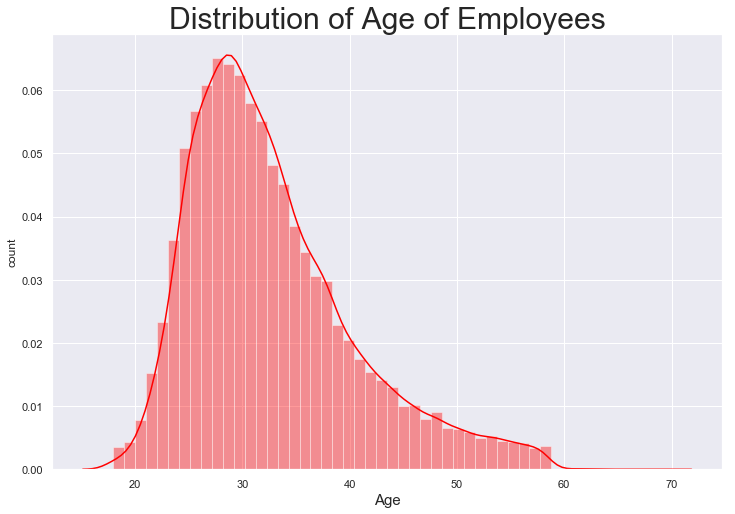

In [63]:
# checking the distribution of age of Employees in the company

sns.distplot(Featured_Data['Current Age'], color = 'red')
plt.title('Distribution of Age of Employees', fontsize = 30)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('count')
plt.show()

In [23]:
# checking the different types of recruitment channels for the company

Data['Channel_of_Recruitment'].value_counts()

Agency and others                  21310
Direct Internal process            16194
Referral and Special candidates      808
Name: Channel_of_Recruitment, dtype: int64

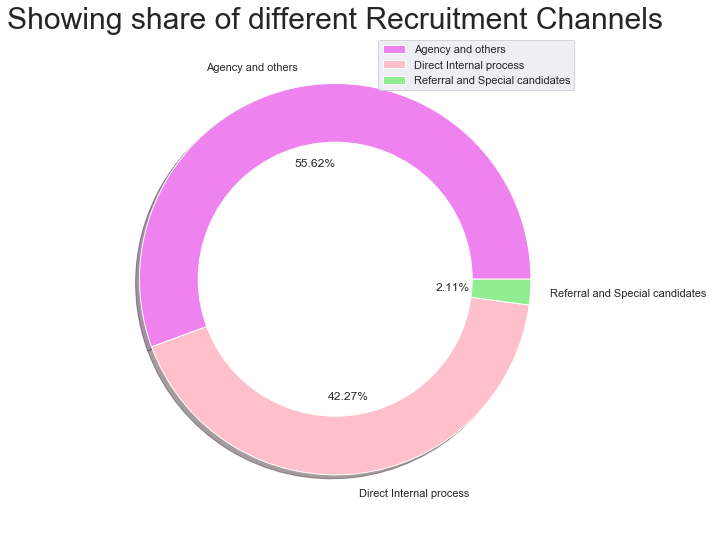

In [35]:
# plotting chart for visualizing each of the recruitment channel's 

size = [21310, 16194, 808]
colors = ['violet', 'pink', 'lightgreen']
labels = "Agency and others", "Direct Internal process", "Referral and Special candidates"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Showing share of different Recruitment Channels', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

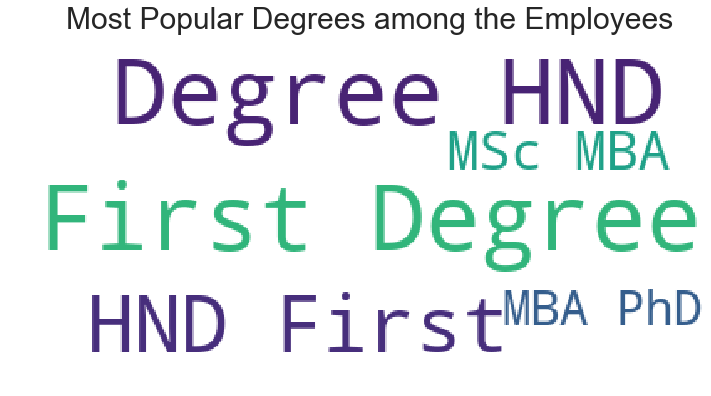

In [36]:
# checing the most popular education degree among the employees

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopword = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'white', stopwords = stopword, max_words = 5).generate(str(Data['Qualification']))

plt.rcParams['figure.figsize'] = (12, 8)
print(wordcloud)
plt.imshow(wordcloud)
plt.title('Most Popular Degrees among the Employees', fontsize = 30)
plt.axis('off')
plt.show()

## FEATURE ENGINEERING 

In the feature engineering section we engineer nine new features which includes Recriutment age, current age, length of service, and varying score and score performance.

In [39]:
# Engineering new features that is  Recruitment age, current age and length of service in years 
Data['Recruited Age'] = Data['Year_of_recruitment'] - Data['Year_of_birth']
Data['Current Age'] = 2019 - Data['Year_of_birth']
Data['Length_of_service'] = 2019 - Data['Year_of_recruitment']

In [40]:
Data['Score_2'] = (Data.Training_score_average)**2
Data['Score_3'] = (Data.Training_score_average)**3
#Data['Score_Performance'] = (Data.Training_score_average)/(Data.Last_performance_score)
Data['score_performance_1'] = (Data.Training_score_average)+(Data.Last_performance_score)
#Data['score_performance_3'] = ((Data.Training_score_average)+(Data.Targets_met))/Data.Trainings_Attended

#Data['score_perf3'] = ((Data.Training_score_average)+(Data.Last_performance_score))/Data.Trainings_Attended
#Data['Targets_met_Previos'] = (Data.Targets_met) + (Data.Previous_Award)#
Data['Started_of_Company']=np.where(Data['No_of_previous_employers']=='0','Yes','No')
Data['Years with Company'] = 2019-Data['Year_of_recruitment']

In [41]:
#Data['Division_Score'] = Data['Division'] + np.digitize(Data['Training_score_average'], [30, 40, 50, 60, 70, 80, 90, 100])
Data['Targets_met_Score'] = Data['Targets_met'] + np.digitize(Data['Training_score_average'], [30, 40, 50, 60, 70, 80, 90, 100])
Data['LPS_Score'] = Data['Last_performance_score'] + np.digitize(Data['Training_score_average'], [30, 40, 50, 60, 70, 80, 90, 100])
#Data['Division_Targets_met'] = Data['Division'] + Data['Targets_met']
Data['Division_LPS'] = Data['Last_performance_score'] + Data['Targets_met']

In [42]:
 Performance_Score=[]
    
for score in Data['Last_performance_score']:
    if (score>-1 and score<6):
         Performance_Score.append('Low')
    elif (score>4 and score<11):
         Performance_Score.append('Average')
    else:
         Performance_Score.append('High')


Data['Perfomance Rating'] = Performance_Score

Text(0.5, 1.0, 'Covariance heatmap')

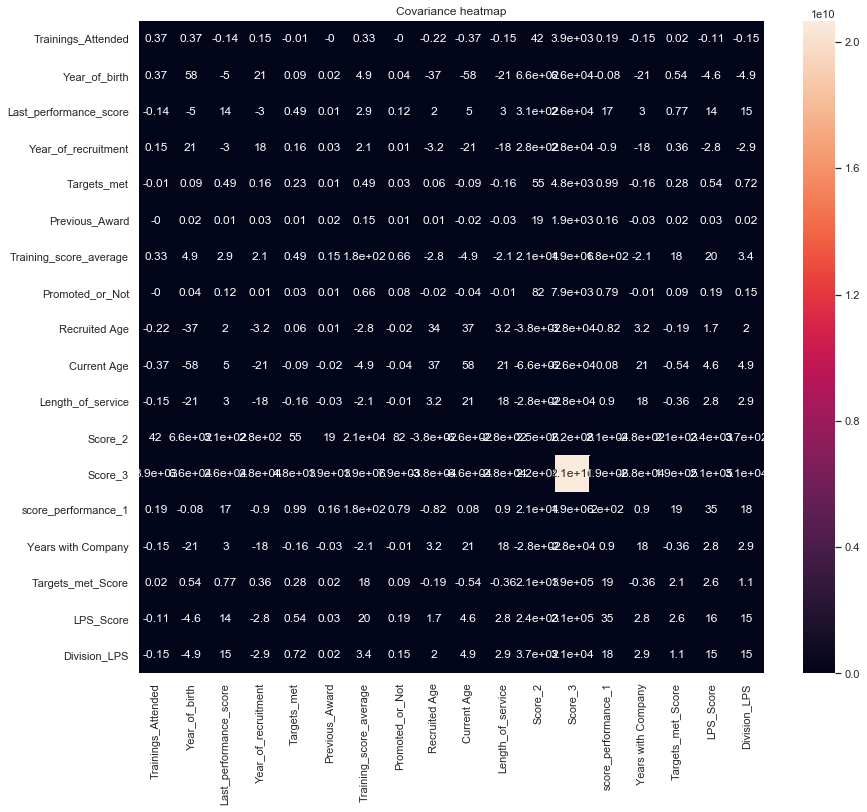

In [43]:
plt.figure(figsize=(14,12))
sns.heatmap(Data.cov().round(decimals=2), annot=True)
plt.title("Covariance heatmap")

Text(0.5, 1.0, 'Correlation heatmap')

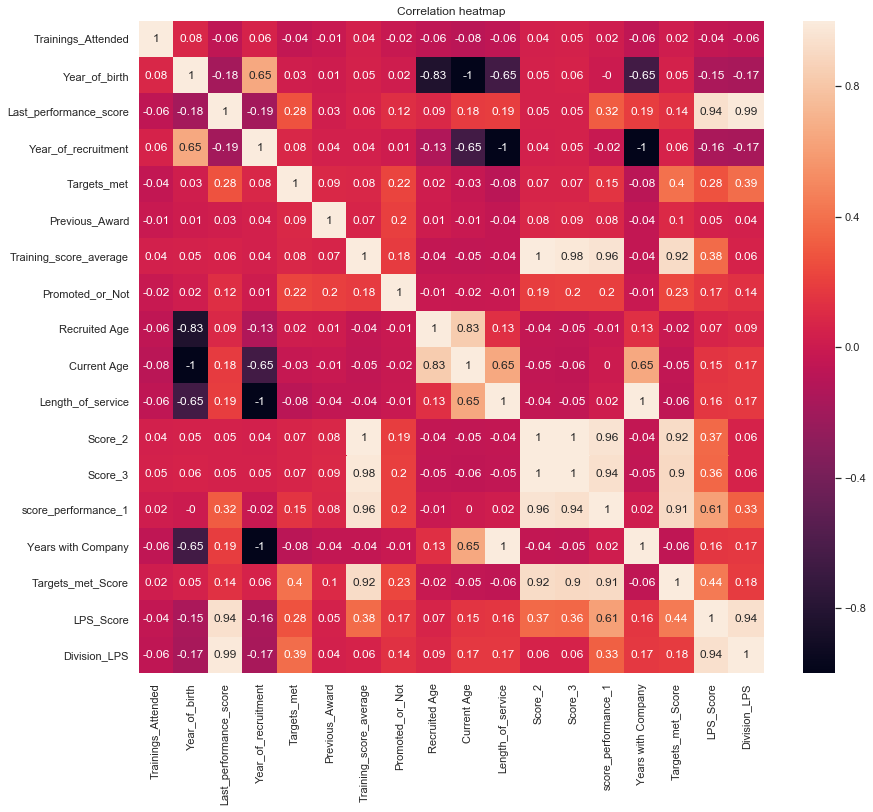

In [44]:
plt.figure(figsize=(14,12))
sns.heatmap(Data.corr().round(decimals=2), annot=True)
plt.title("Correlation heatmap")

In [45]:
# Dropping columns not needed 
cols =['EmployeeNo']
Featured_Data = Data.drop(cols, axis=1)

In [46]:
Featured_Data.head()

,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,...,Score_2,Score_3,score_performance_1,Started_of_Company,Years with Company,Targets_met_Score,LPS_Score,Division_LPS,Training and Award,Perfomance Rating
0,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,...,1681,68921,53.5,Yes,8,3,14.5,13.5,Few trainings without award,High
1,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,...,2704,140608,64.5,Yes,4,3,15.5,12.5,Few trainings without award,High
2,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,...,1764,74088,49.5,Yes,7,2,9.5,7.5,Few trainings without award,Average
3,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,...,1764,74088,44.5,No,10,2,4.5,2.5,Few trainings without award,Low
4,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,...,5929,456533,84.5,No,7,5,12.5,7.5,Few trainings without award,Average


In [47]:
Featured_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 29 columns):
Division                               38312 non-null object
Qualification                          38312 non-null object
Gender                                 38312 non-null object
Channel_of_Recruitment                 38312 non-null object
Trainings_Attended                     38312 non-null int64
Year_of_birth                          38312 non-null int64
Last_performance_score                 38312 non-null float64
Year_of_recruitment                    38312 non-null int64
Targets_met                            38312 non-null int64
Previous_Award                         38312 non-null int64
Training_score_average                 38312 non-null int64
Foreign_schooled                       38312 non-null object
Past_Disciplinary_Action               38312 non-null object
Previous_IntraDepartmental_Movement    38312 non-null object
No_of_previous_employers               383

In [48]:
# Encoding features using one hot encoding 
Object_data=Featured_Data.select_dtypes(include=['object'])
Object_data_dummies = pd.get_dummies(Object_data)
Featured_Data = pd.concat([Data, Object_data_dummies], axis=1)
Featured_Data = Featured_Data.select_dtypes(exclude=['object'])

In [49]:
 # Importing libraries 
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn import under_sampling, over_sampling
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from sklearn import svm  
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from collections import Counter
from sklearn.svm import LinearSVC, SVC
from xgboost import XGBClassifier
import xgboost as xgb
import numpy as np
import pandas as pd
import numpy as np
from itertools import cycle
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import roc_curve, f1_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline

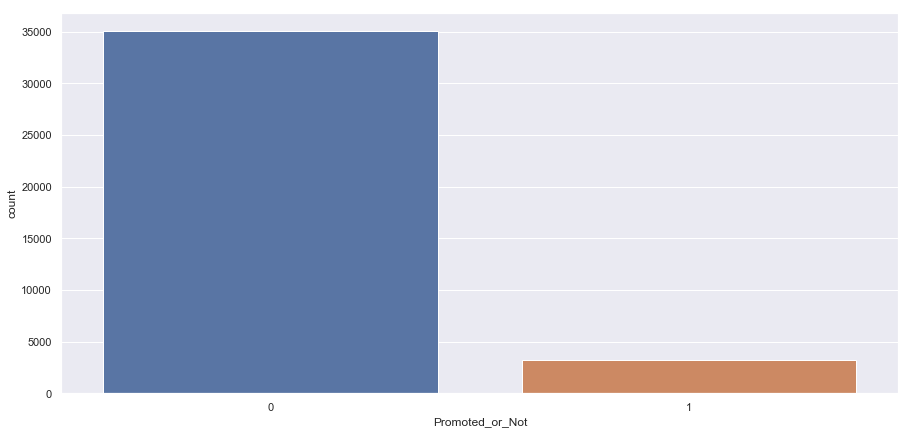

In [41]:
# Visualising class imbalance 
sns.countplot(x="Promoted_or_Not", data=Data)

### Important Observations 

Of the 382382 employers present in the dataset, 8.56% ended up to be promoted and 91.5% ended up not promoted. In order to properly train and assess our model, we address this disproportion to make sure our predictions can accurately predict both categories, and do not overly lean towards predicting absence. We do so by a technique called upsampling, i.e. sampling with replacement from the population of employers who are promoted until we get two groups of comparable size.

In [42]:
# Computing for percentage of imbalance 
Count_Promoted = len(Data[Data["Promoted_or_Not"] == 1])

Count_Not_Promoted = len(Data[Data["Promoted_or_Not"] == 0])

Percentage_of_Promoted = Count_Promoted/(Count_Promoted + Count_Not_Promoted)
print("Percentage of Promoted = ", Percentage_of_Promoted * 100)

Percentage_of_Not_Promoted = Count_Not_Promoted/(Count_Promoted + Count_Not_Promoted)
print("Percentage of Not Promoted = ", Percentage_of_Not_Promoted * 100)

Percentage of Promoted =  8.459490499060347
Percentage of Not Promoted =  91.54050950093965


In [50]:
# Dropping column
Y = Featured_Data['Promoted_or_Not']
X = Featured_Data.drop('Promoted_or_Not', axis=1)

In [51]:
# class distribution
print ("Not Promoted:", Featured_Data['Promoted_or_Not'][Data['Promoted_or_Not'] == 0].count()) #class = 0
print ("Promoted:", Featured_Data['Promoted_or_Not'][Data['Promoted_or_Not'] == 1].count()) #class = 1

Not Promoted: 35071
Promoted: 3241


In [52]:
# setting up testing and training sets
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Oversampling the dataset
sm = ADASYN(random_state=42)
X_Train, Y_Train = sm.fit_sample(X_Train, Y_Train)

In [53]:
X_Train.shape

(56785, 56)

In [54]:
Y_Train.shape

(56785,)

## - MODELS FITTING

We test out  different classification models Binary Logistic Regression, Decision Tree Classifier, Random Forest Classifier, a Support Vector Machine Classifier and an xgBoost classifier and assess their accuracy and F1 score on a test set. It is important to consider both (not only the accuracy), because the latter metric allows us to adjust for the class imbalance present in the test set and, by extension, in the real world. Due to the lack of striking differences in results between the five models, we choose to further tune a logistic regression model given its greater interpretability. We do this through cross validation, leveraging a GridSearch algorithm to find the best combination of parameters. 
We chose these parameters specifically because they are related to preventing overfitting.

 

# <center>LOGISTIC MODEL</center>

In [50]:
############################### Hyperparameter for logistic model #########################################
penalty = ['l1', 'l2']

C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]

solver = ['liblinear', 'saga']

param_grid = dict(penalty=penalty,

                  C=C,

                  class_weight=class_weight,

                  solver=solver)


grid = GridSearchCV(estimator=lr,

                    param_grid=param_grid,

                    scoring=metrics.make_scorer(metrics.scorer.f1_score, average="macro"),

                    verbose=1,

                    n_jobs=-1, cv=5)

grid_result = grid.fit(X_Train, Y_Train)

print('Best Score: ', grid_result.best_score_)

print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 45.1min


Best Score:  0.8101512004516399
Best Params:  {'C': 0.1, 'class_weight': {1: 0.7, 0: 0.3}, 'penalty': 'l1', 'solver': 'liblinear'}


In [56]:

################################ Fitting Logistics regression model ########################################

lr = LogisticRegression(random_state=42, C= 0.1, class_weight={1: 0.7, 0: 0.3}, penalty='l1', solver='liblinear')
lr.fit(X_Train, Y_Train)
 
# Predict on training set
pred_y = lr.predict(X_Test)
 
# Is our model still predicting just one class?
print(np.unique(pred_y))
 
# Obtaining confusion matrix 
print(confusion_matrix(Y_Test, pred_y))
print("Accuracy: %.2f%%" % accuracy_score(Y_Test, pred_y))
print(classification_report(Y_Test, pred_y))
print("f1 Score: %.2f%%" %f1_score(Y_Test, pred_y))
print("Cross validation score : ")
logit_scores=cross_val_score(lr,X_Train,Y_Train,cv=5)
logit_scores

[0 1]
[[4649 2347]
 [  39  628]]
Accuracy: 0.69%
              precision    recall  f1-score   support

           0       0.99      0.66      0.80      6996
           1       0.21      0.94      0.34       667

    accuracy                           0.69      7663
   macro avg       0.60      0.80      0.57      7663
weighted avg       0.92      0.69      0.76      7663

f1 Score: 0.34%
Cross validation score : 


array([0.81341904, 0.82028705, 0.8207273 , 0.81289073, 0.81465176])

### Feature Importance for Logistic model 

In [78]:
Feature_importance = pd.DataFrame(lr.feature_importances_,columns)
Feature_importance.columns=['Importance']
Feature_importance.sort_values(by='Importance', ascending=False)

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'


# <center>RANDOM FOREST MODEL</center>

In [79]:

############################### Hyperparameter for Random Forest Model ####################################

criterion=['gini','entropy']
bootstrap=[True,False]
n_estimators=[10,100,1000]
param_grid = dict(criterion=criterion, bootstrap=bootstrap, n_estimators=n_estimators)



grid = GridSearchCV(n_estimators=[10,100,1000],

                    param_grid=param_grid,

                   scoring=metrics.make_scorer(metrics.scorer.f1_score, average="macro"),

                    verbose=1,

                    n_jobs=-1, cv=5)
    
grid_result = grid.fit(X_Train, Y_Train)



print('Best Score: ', grid_result.best_score_)

print('Best Params: ', grid_result.best_params_)


TypeError: __init__() got an unexpected keyword argument 'n_estimators'

In [59]:
############################### Building random forest using the RandomForest model ##########################

random_forest = RandomForestClassifier(random_state=42, n_estimators=250, criterion= 'gini', oob_score=True)
random_forest.fit(X_Train, Y_Train)
rfc_prediction = random_forest.predict(X_Test)

################################################################################################
################################################################################################
print(confusion_matrix(Y_Test, rfc_prediction))
print(np.unique(rfc_prediction))
print("Accuracy: %.2f%%" % accuracy_score(Y_Test, rfc_prediction))
print(classification_report(Y_Test, rfc_prediction))
print("f1 Score: %.2f%%" %f1_score(Y_Test, rfc_prediction))
print("Cross validation score : ")
logit_scores=cross_val_score(random_forest,X_Train,Y_Train,cv=5)
logit_scores

[[6934   62]
 [ 504  163]]
[0 1]
Accuracy: 0.93%
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      6996
           1       0.72      0.24      0.37       667

    accuracy                           0.93      7663
   macro avg       0.83      0.62      0.66      7663
weighted avg       0.91      0.93      0.91      7663

f1 Score: 0.37%
Cross validation score : 


array([0.79237475, 0.99542133, 0.99603769, 0.99374835, 0.99471691])

### Feature Importance for random forest 

In [62]:
columns=Featured_Data.drop('Promoted_or_Not',axis=1).columns

In [63]:
Feature_importance = pd.DataFrame(random_forest.feature_importances_,columns)
Feature_importance.columns=['Importance']
Feature_importance.sort_values(by='Importance', ascending=False)

,Importance
Targets_met,1.396770e-01
Division_LPS,6.188072e-02
Training and Award_Few trainings without award,5.320254e-02
Targets_met_Score,4.939086e-02
Channel_of_Recruitment_Direct Internal process,4.339713e-02
Channel_of_Recruitment_Agency and others,3.917134e-02
No_of_previous_employers_1,3.591867e-02
Started_of_Company_No,3.335921e-02
No_of_previous_employers_0,3.186236e-02
Started_of_Company_Yes,3.130893e-02


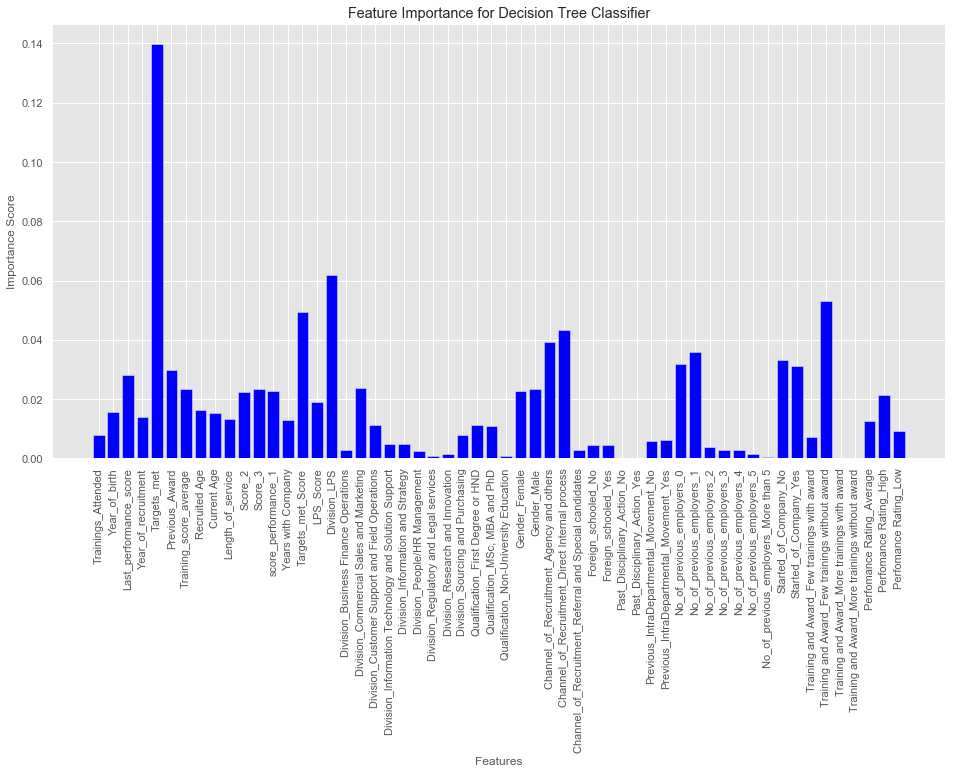

In [66]:
plt.style.use('ggplot')

rf_col = columns
rf_scores = random_forest.feature_importances_

rf_pos = [i for i, _ in enumerate(rf_col)]

plt.figure(figsize=(16,8))
plt.bar(rf_pos, rf_scores, color='blue')
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance for Decision Tree Classifier")
plt.xticks(rf_pos,rf_col,rotation=90)

plt.show()

 # <center>SVM MODEL</center>

In [88]:
support_vector = SVC()

In [ ]:
#################################### Hyperparameter for SVM #########################################
C = [0.01, 0.1, 1, 10]
gamma=[0.1,1,10]

#param_grid = dict(C=C,gamma=gamma)

param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}



grid = RandomizedSearchCV(SVC(),param_grid,refit = True, verbose=2)

grid_result = grid.fit(X_Train, Y_Train)



print('Best Score: ', grid_result.best_score_)

print('Best Params: ', grid_result.best_params_)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] kernel=linear, gamma=1, C=100 ...................................


In [ ]:
############################# Building a basic SVM model using the SVC method #############################
support_vector = SVC(random_state=42)
support_vector.fit(X_Train, Y_Train)
s_prediction = support_vector.predict(X_Test)

############################################################################################################
############################################################################################################
print("Confusion matrix: ")
print(confusion_matrix(Y_Test, s_prediction))
print(np.unique(s_prediction))
print("Accuracy: %.2f%%" % accuracy_score(Y_Test, s_prediction))
print(classification_report(Y_Test , s_prediction))
print("f1 Score: %.2f%%" %f1_score(Y_Test, s_prediction))
print("Cross validation score : ")
logit_scores=cross_val_score(support_vector,X_Train,Y_Train,cv=5)
logit_scores

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Confusion matrix: 
[[5881 1115]
 [ 361  306]]
[0 1]
Accuracy: 0.81%
              precision    recall  f1-score   support

           0       0.94      0.84      0.89      6996
           1       0.22      0.46      0.29       667

    accuracy                           0.81      7663
   macro avg       0.58      0.65      0.59      7663
weighted avg       0.88      0.81      0.84      7663

f1 Score: 0.29%
Cross validation score : 


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default 

### Feature Importance for SVM 

  # <center>DECISION TREE MODEL</center>

In [65]:
################################ Hyperparameter for decision tree model ###############################

criterion=['gini','entropy']
presort=[True,False]
param_grid = dict(criterion=criterion,presort=presort)


grid = GridSearchCV(estimator=decision_tree,

                    param_grid=param_grid,

                    scoring=metrics.make_scorer(metrics.scorer.f1_score, average="macro"),

                    verbose=1,

                    n_jobs=-1, cv=5)

grid_result = grid.fit(X_Train, Y_Train)



print('Best Score: ', grid_result.best_score_)

print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   58.0s finished


Best Score:  0.9317499211846398
Best Params:  {'criterion': 'entropy', 'presort': True}


In [68]:
################### Implementing decision tree using DecisionTreeClassifier method #################
decision_tree = DecisionTreeClassifier(random_state=42, criterion= 'entropy', presort= True)
decision_tree = decision_tree.fit(X_Train,Y_Train)
dtc_prediction = decision_tree.predict(X_Test)

##########################################################################################################
##########################################################################################################
print(confusion_matrix(Y_Test, dtc_prediction)) # Computing confusion matrix 
print(np.unique(dtc_prediction))
print("Accuracy: %.2f%%" % accuracy_score(Y_Test, dtc_prediction))
print(classification_report(Y_Test , dtc_prediction))
print("f1 Score: %.2f%%" %f1_score(Y_Test, dtc_prediction))
print("Cross validation score : ")
logit_scores=cross_val_score(decision_tree,X_Train,Y_Train,cv=5) # Computing cross validation score 
logit_scores

[[6543  453]
 [ 392  275]]
[0 1]
Accuracy: 0.89%
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      6996
           1       0.38      0.41      0.39       667

    accuracy                           0.89      7663
   macro avg       0.66      0.67      0.67      7663
weighted avg       0.89      0.89      0.89      7663

f1 Score: 0.39%
Cross validation score : 


array([0.82143172, 0.96442723, 0.96372281, 0.96108127, 0.96389892])

### Feature Importance (DTC)

In [69]:
Feature_importance = pd.DataFrame(decision_tree.feature_importances_,columns)
Feature_importance.columns=['Importance']
Feature_importance.sort_values(by='Importance', ascending=False)

,Importance
Targets_met,0.324531
Channel_of_Recruitment_Agency and others,0.103255
Score_2,0.061927
Training and Award_Few trainings without award,0.050984
Previous_Award,0.048246
Division_Commercial Sales and Marketing,0.043676
No_of_previous_employers_1,0.043237
LPS_Score,0.028640
Score_3,0.027554
Division_Sourcing and Purchasing,0.025466


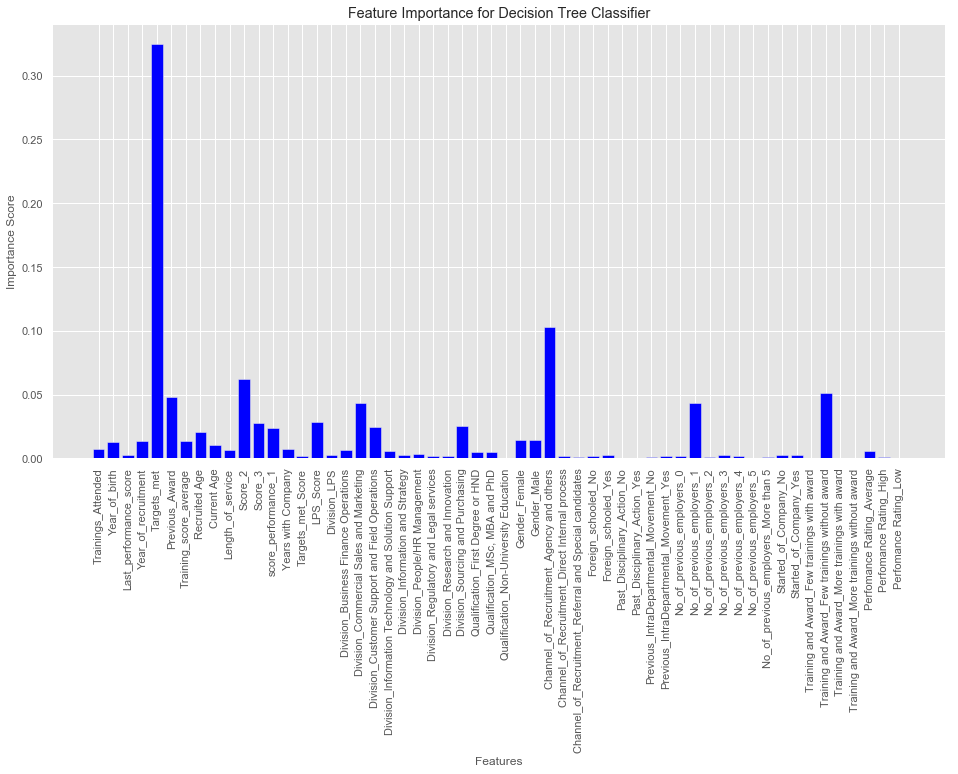

In [70]:
plt.style.use('ggplot')

dtc_col = columns
dtc_scores = decision_tree.feature_importances_

dtc_pos = [i for i, _ in enumerate(rf_col)]

plt.figure(figsize=(16,8))
plt.bar(dtc_pos, dtc_scores, color='blue')
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance for Decision Tree Classifier")
plt.xticks(dtc_pos,dtc_col,rotation=90)

plt.show()

  # <center>XGBOOST MODEL</center>

In [132]:
gamma=[ 0.01, 0.1]
learning_rate=[0.01, 0.1]
param_grid = dict(gamma=gamma,learning_rate=learning_rate)



grid = GridSearchCV(estimator=model,

                    param_grid=param_grid,

                    scoring=metrics.make_scorer(metrics.scorer.f1_score, average="macro"),

                    verbose=1,

                    n_jobs=-1, cv=5)

grid_result = grid.fit(X_Train, Y_Train)



print('Best Score: ', grid_result.best_score_)

print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  4.3min finished


Best Score:  0.9338851626684148
Best Params:  {'gamma': 0.01, 'learning_rate': 0.1}


In [71]:
################################## fit XgBoost model on training data #####################################

model = XGBClassifier(objective="binary:logistic", reg_alpha=0.01, 
                          random_state=42, learning_rate=0.1, n_estimators=200,
                          eval_metric=["auc", "error",'logloss',"error@0.6"])
model.fit(X_Train, Y_Train)
# predictions for test data
y_pred = model.predict(X_Test.values)
predictions = [round(value) for value in y_pred]
print(np.unique(dtc_prediction))

###########################################################################################################
###########################################################################################################
accuracy = accuracy_score(Y_Test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
classification = classification_report(Y_Test, predictions)
print(classification)
# Confusion matrix 
conf_mat=confusion_matrix(y_true=Y_Test, y_pred=predictions)
print ("confusion matrix: \n", conf_mat)
#random_state=42,learning_rate=0.1,gamma=0.01
print("f1 Score: %.2f%%" %f1_score(Y_Test, y_pred,average='macro'))
#xgb_f1=f1_score(y_boost_test, xgb_pred,average='macro')

[0 1]
Accuracy: 93.24%
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      6996
           1       0.92      0.24      0.39       667

    accuracy                           0.93      7663
   macro avg       0.93      0.62      0.68      7663
weighted avg       0.93      0.93      0.91      7663

confusion matrix: 
 [[6982   14]
 [ 504  163]]
f1 Score: 0.68%


#### Feature Importance for XGBoost 

In [72]:
Feature_importance = pd.DataFrame(model.feature_importances_,columns)
Feature_importance.columns=['Importance']
Feature_importance.sort_values(by='Importance', ascending=False)

,Importance
Targets_met,0.145014
Channel_of_Recruitment_Direct Internal process,0.114240
Training and Award_Few trainings without award,0.082712
No_of_previous_employers_1,0.078315
Channel_of_Recruitment_Agency and others,0.073428
Gender_Female,0.069724
No_of_previous_employers_0,0.058609
Previous_Award,0.052769
LPS_Score,0.032836
Division_Commercial Sales and Marketing,0.031674


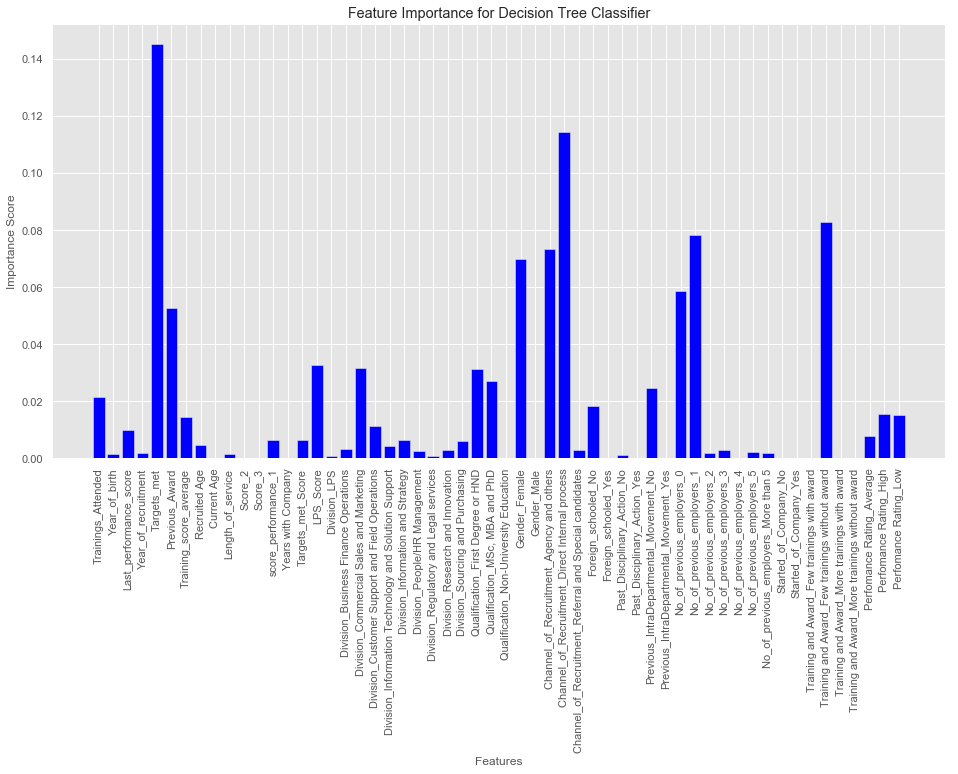

In [73]:
plt.style.use('ggplot')

xgb_col = columns
xgb_scores = model.feature_importances_

xgb_pos = [i for i, _ in enumerate(rf_col)]

plt.figure(figsize=(16,8))
plt.bar(xgb_pos, xgb_scores, color='blue')
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance for Decision Tree Classifier")
plt.xticks(xgb_pos,xgb_col,rotation=90)

plt.show()

## -ROC CURVE FOR FEATURES 

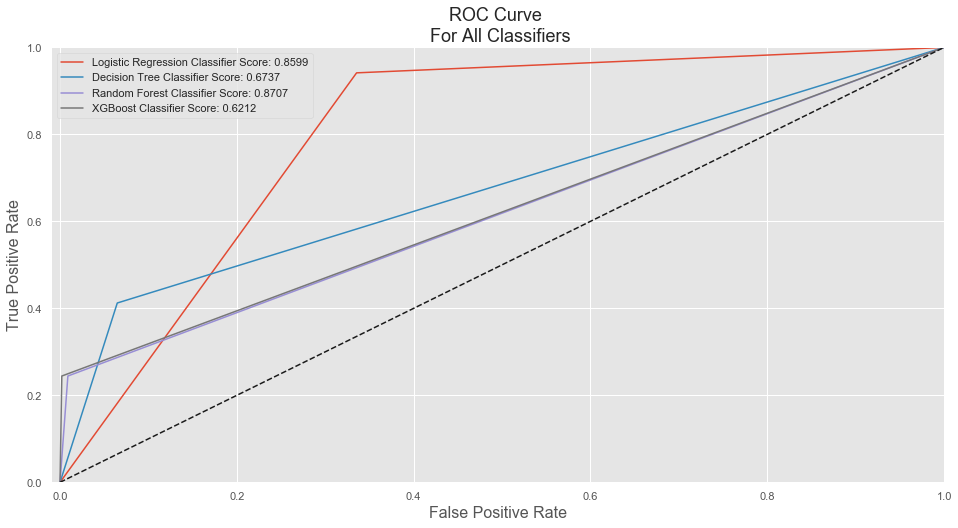

In [77]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

log_fpr, log_tpr, log_thresold = roc_curve(Y_Test, pred_y)
dtc_fpr, dtc_tpr, dtc_threshold = roc_curve(Y_Test, dtc_prediction)
#svc_fpr, svc_tpr, svc_threshold = roc_curve(Y_Test, s_prediction)
rf_fpr, rf_tpr, rf_threshold = roc_curve(Y_Test, rfc_prediction)
xgb_fpr, xgb_tpr, xgb_threshold = roc_curve(Y_Test, y_pred)



def graph_roc_curve_multiple(log_fpr, log_tpr, dtc_fpr, dtc_tpr, rf_fpr, rf_tpr, xgb_fpr, xgb_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n For All Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(Y_Test, lr.predict_proba(X_Test)[:, 1])))
    plt.plot(dtc_fpr, dtc_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(Y_Test, decision_tree.predict_proba(X_Test)[:, 1])))
#    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(Y_Test, s_prediction)))
    plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(Y_Test, random_forest.predict_proba(X_Test)[:, 1])))
    plt.plot(xgb_fpr, xgb_tpr, label='XGBoost Classifier Score: {:.4f}'.format(roc_auc_score(Y_Test, y_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    #plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                #arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                #)
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr,dtc_fpr, dtc_tpr,rf_fpr, rf_tpr,xgb_fpr, xgb_tpr)
plt.show()

## - Maximum Hard Voting Ensemble Model of the five base models 

In [76]:
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection

voting_clf = VotingClassifier(
estimators = [('logistic', lr), ('Decision Tree', decision_tree), ('Random Forest',random_forest),('XGB',model)],
voting = 'hard')
labels = ['Logistic Regression', 'Decision Tree', 'XGBoost','Random Forest','Ensemble']

for (clf, label) in zip([lr, decision_tree,model,random_forest, voting_clf], labels):

    scores = model_selection.cross_val_score(clf, X_Train, Y_Train, 
                                              cv=5, 
                                              scoring='f1')
    print("F1 Score: %0.2f  [%s]" 
          % (scores.mean(),  label))

F1 Score: 0.84  [Logistic Regression]
F1 Score: 0.93  [Decision Tree]
F1 Score: 0.94  [XGBoost]
F1 Score: 0.94  [Random Forest]
F1 Score: 0.94  [Ensemble]


## The Results 

After optimization, The XGBoost model which reaches 93.4% accuracy on the test set, with an F1 score of 0.64. These two metrics together although are very encouraging: with only data about 38312 employers we are able to efficiently categorize users in these two categories, without drastic difference in performance in predicting one or the other. Interestingly, the performance of our model did not improve after grid search. We assessed the robustness of the model by training and predicting with varying random states, and found that the accuracy of the model was very consistent across them.
Looking at feature importance, our earlier intuition was confirmed: both static variables target met, trainings and awards and, channel of recruitment bear a heavy weight in our predictions. This should encourage Kofi Essien in logging as much information as possible, as all signals are important when trying to predict staff promotions .

## The Conclusion 
Finally, it is important that this model be re-trained regularly as mitigating actions are implemented and the employment base in the company grows and evolves, in order to make this model adapt to changing conditions of the company.